In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/antiviral_homology_90.csv')
pivoted = pd.read_csv("../../utils/pivoted_sequences_non_filter.csv")

In [3]:
filter=df.filter(items=['sequence','target', 'experimental_characteristics','half_life_seconds','length_sequence'])

In [4]:
df['target'].value_counts()

target
0    678
1    437
2    198
Name: count, dtype: int64

In [5]:
filter.describe().round(2)

,target,half_life_seconds,length_sequence
count,1313.00,1313.00,1313.00
mean,0.63,11635.70,17.42
std,0.73,10478.11,7.68
min,0.00,2880.00,5.00
25%,0.00,7200.00,13.00
50%,0.00,7200.00,16.00
75%,1.00,10800.00,20.00
max,2.00,72000.00,48.00


In [6]:
filter.drop(columns=['half_life_seconds','length_sequence'], inplace=True)

In [7]:
merge=pd.merge(pivoted, filter, on='sequence', how='right')

In [8]:
merge

,sequence,Anti_HIV,Therapeutic,Anti_nematode,Anti_coronaviridae,Anti_feline_coronavirus,Enzyme_inhibitor,Anti_west_nile_virus,Anti_junin_virus,Anti_iridoviridae,...,Anti_puumala_virus,Anti_amnesic,Cytokine,Anti_hendra_virus,Potentiator,Neuropeptide,Anti_white_spot_syndrome_virus,Anti_herpesviridae,target,experimental_characteristics
0,AAAMSQVTN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Mammalian
1,AACEVAKNLNESLIDLQELGKYEQYIKW,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Mammalian
2,AAGAVVNDL,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Mammalian
3,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Mammalian
4,AAKAWKKAKAWKKAKWWKKAA,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Mammalian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,YVREHGVPIHADKYFEQVLK,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Mammalian
1309,YWILEYLWKVPFDFWRGV,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E_coli
1310,YWILEYLWKVPFDFWRGV,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Mammalian
1311,YWILEYLWKVPFDFWRGV,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,Yeast


In [9]:
exc=['sequence', 'target', 'experimental_characteristics']
zeros=(merge.drop(columns=exc, errors='ignore') == 0).all()
column=zeros[~zeros].index.tolist()
df=exc+column

df_filter=merge[df]

In [10]:
df_filter=df_filter.drop(columns=['sequence'])
df_filter

,target,experimental_characteristics,Anti_HIV,Therapeutic,Anti_coronaviridae,Anti_feline_coronavirus,Enzyme_inhibitor,Anti_west_nile_virus,Anti_iridoviridae,Anti_rhabdoviridae,...,Hormone,Anti_flaviviridae,Anti_arteriviridae,Molecular_binding,Anti_hepatitis_B_virus,Anti_human_coronavirus,Anti_human_parainfluenza_virus,Anti_hendra_virus,Neuropeptide,Anti_herpesviridae
0,1,Mammalian,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Mammalian,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Mammalian,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,Mammalian,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,Mammalian,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,1,Mammalian,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1309,0,E_coli,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1310,1,Mammalian,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1311,2,Yeast,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_filter['Antiviral'].value_counts()

Antiviral
1    1313
Name: count, dtype: int64

In [12]:
grouped=df_filter.groupby(['target', 'experimental_characteristics']).sum().T

In [13]:
grouped['total']=grouped.sum(axis=1)

In [14]:
viridae_filter=grouped[grouped.index.str.endswith('viridae')]
sub_grouped=grouped[~grouped.index.str.endswith('viridae')]

In [15]:
viridae_filter.sort_values(by='total', ascending=False, inplace=True)
viridae_filter.to_csv('../../rest/viridae_filter.csv', index=True)

/tmp/ipykernel_10107/1966567193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viridae_filter.sort_values(by='total', ascending=False, inplace=True)


In [16]:
virus_list = [
    "Anti_HIV",
    "Anti_feline_immunodeficiency_virus",
    "Anti_simian_immunodeficiency_virus",
    "Anti_feline_leukemia_virus",
    "Anti_human_t-cell_leukaemia_virus_1",
    "Anti_avian_sarcoma_and_leukosis_virus-_a",
    "Anti_human_t-lymphotropic_virus",
    "Anti_murine_leukemia_virus",
    "Anti_avian_myeloblastosis_virus",
    "Anti_hepatitis_C_virus",
    "Anti_dengue_virus",
    "Anti_hepatitis_B_virus",
    "Anti_west_nile_virus",
    "Anti_japanese_encephalitis_virus",
    "Anti_ebola_virus",
    "Anti_zika_virus",
    "Anti_mouse_hepatitis_virus",
    "Anti_hepatitis_E_virus",
    "Anti_tembusu_virus",
    "Anti_yellow_fever_virus",
    "Anti_classical_swine_fever_virus",
    "Anti_SARS-COV_2",
    "Anti_SARS-COV",
    "Anti_coronavirus",
    "Anti_MERS-COV",
    "Anti_human_coronavirus",
    "Anti_canine_coronavirus",
    "Anti_feline_coronavirus",
    "Anti_transmissible_gastroenteritis_virus",
    "Anti_murine_hepatitis_virus",
    "Anti_sl-cov-wiv1",
    "Anti_porcine_respiratory_coronavirus",
    "Anti_herpes_simplex_virus",
    "Anti_human_cytomegalovirus",
    "Anti_marek's_disease_virus",
    "Anti_varicella_zoster_virus",
    "Anti_bovine_herpesvirus_type_1",
    "Anti_respiratory_syncytial_virus",
    "Anti_human_parainfluenza_virus",
    "Anti_measles_virus",
    "Anti_newcastle_disease_virus",
    "Anti_hendra_virus",
    "Anti_human_metapneumovirus",
    "Anti_sendai_virus",
    "Anti_metapneumovirus",
    "Anti_nipah_virus",
    "Anti_influenza_virus",
    "Anti_H1N1_virus",
    "Anti_H3N2_virus",
    "Anti_avian_influenza_virus",
    "Anti_H5N1_virus",
    "Anti_sin_nombre_virus",
    "Anti_andes_virus",
    "Anti_puumala_virus",
    "Anti_vaccinia",
    "Anti_cowpox_virus",
    "Anti_monkeypox_virus",
    "Anti_coxsackie_virus",
    "Anti_encephalomyocarditis_virus",
    "Anti_enterovirus",
    "Anti_duck_hepatitis_virus",
    "Anti_foot-and-mouth_disease_virus",
    "Anti_rhinovirus",
    "Anti_rabies_virus",
    "Anti_vesicular_stomatistic_virus",
    "Anti_human_papiloma_virus",
    "Anti_porcine_reproductive_and_respiratory_syndrome_virus",
    "Anti_frog_virus",
    "Anti_singapore_grouper_iridovirus",
    "Anti_adenovirus",
    "Anti_bk_virus",
    "Anti_pichinde_virus",
    "Anti_junin_virus",
    "Anti_lymphocytic_choriomeningitis_virus",
    "Anti_tacaribe_virus",
    "Anti_minute_virus_of_mice",
    "Anti_mink_enteritis_virus",
    "Anti_kaposi's_sarcoma-associated_herpes_virus",
    "Anti_epstein-barr_virus",
    "Anti_white_spot_syndrome_virus",
    "Anti_simian_rotavirus",
    "Anti_bovine_rotavirus",
    "Anti_channel_catfish_virus",
    "Anti_nervous_necrosis_virus",
    "Anti_african_swine_fever_virus",
    "Anti_chikungunya_virus",
    "Anti_rift_valley_fever_virus",
    "Anti_grass_carp_hemorrhage_virus",
    "Anti_murine_norovirus"
]

In [17]:
sub_grouped_2=sub_grouped[sub_grouped.index.isin(virus_list)]
others=sub_grouped[~sub_grouped.index.isin(virus_list)]

In [18]:
sub_grouped_2

target                                                  0                  \
experimental_characteristics                       E_coli Mammalian Yeast   
Anti_HIV                                              119        81    16   
Anti_feline_coronavirus                                 1         1     0   
Anti_west_nile_virus                                    4        10     4   
Anti_influenza_virus                                   26        36    14   
Anti_herpes_simplex_virus                              23        17     8   
Anti_cowpox_virus                                       1         1     1   
Anti_human_metapneumovirus                              2         1     0   
Anti_newcastle_disease_virus                            2         4     1   
Anti_japanese_encephalitis_virus                        4        10     4   
Anti_human_papiloma_virus                               0         0     0   
Anti_tembusu_virus                                      0         1     0   
Anti_feline_immunodeficiency_virus                     38        33     1   
Anti_MERS-COV                                           2         3     0   
Anti_porcine_reproductive_and_respiratory_syndr...      2         0     0   
Anti_coronavirus                                        1         2     0   
Anti_human_cytomegalovirus                              2         1     0   
Anti_SARS-COV_2                                         8        18     0   
Anti_H1N1_virus                                         2         2     2   
Anti_coxsackie_virus                                    3         4     0   
Anti_mouse_hepatitis_virus                              0         2     0   
Anti_canine_coronavirus                                 2         2     0   
Anti_dengue_virus                                       5        10     2   
Anti_avian_influenza_virus                              0         1     0   
Anti_rift_valley_fever_virus                            0         1     0   
Anti_zika_virus                                         0         0     0   
Anti_vaccinia                                           5         5     5   
Anti_monkeypox_virus                                    1         1     1   
Anti_yellow_fever_virus                                 1         1     0   
Anti_hepatitis_E_virus                                  0         1     0   
Anti_SARS-COV                                           2        14     0   
Anti_vesicular_stomatistic_virus                        3         5     1   
Anti_respiratory_syncytial_virus                        2         5     1   
Anti_chikungunya_virus                                  1         1     0   
Anti_adenovirus                                         1         2     0   
Anti_hepatitis_C_virus                                 80       109     4   
Anti_frog_virus                                         2         2     0   
Anti_metapneumovirus                                    2         1     0   
Anti_hepatitis_B_virus                                  0         1     0   
Anti_human_coronavirus                                  0         1     0   
Anti_human_parainfluenza_virus                          0         1     0   
Anti_hendra_virus                                       0         1     0   

target                                                     1               2  \
experimental_characteristics                       Mammalian Yeast Mammalian   
Anti_HIV                                                  69   100        73   
Anti_feline_coronavirus                                    0     1         0   
Anti_west_nile_virus                                       3     2         1   
Anti_influenza_virus                                       6    13         5   
Anti_herpes_simplex_virus                                 22     8         3   
Anti_cowpox_virus                                          0     0         0   
Anti_human_metapneumovirus                      

In [19]:
sub_grouped_2.sort_values(by='total', ascending=False, inplace=True)
sub_grouped_2
sub_grouped_2.to_csv('../../rest/sub_grouped_2.csv', index=True)

/tmp/ipykernel_10107/7444410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_grouped_2.sort_values(by='total', ascending=False, inplace=True)


In [20]:
others.sort_values(by='total', ascending=False, inplace=True)
others
others.to_csv('../../rest/others.csv', index=True)

/tmp/ipykernel_10107/1214261746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others.sort_values(by='total', ascending=False, inplace=True)


In [21]:
def graphic_pie(filter, num, title, distance):
    values = filter[('total', '')].values
    labels = filter.index
    #Se crea un dataframe con los valores y etiquetas
    df_vir = pd.DataFrame({'label': labels, 'value': values})
    #Se toman las filas donde value es menor a num
    df_other = df_vir[df_vir['value'] < num]
    #Se sumna los valores de las filas donde value es menor a num
    other_value = df_other['value'].sum()
    #Se eliminan las filas donde value es menor a num en el dataframe original
    df_vir = df_vir[df_vir['value'] >= num]
    #Se agrega una fila al dataframe original con el valor de la suma de los valores menores a num
    df_vir.loc[len(df_vir)] = {'label': 'Otros', 'value': other_value}

    df_vir['label'] = df_vir['label'].apply(lambda x: ' '.join(x.split('_')).split())
    df_vir['label'] = df_vir['label'].apply(lambda x: '\n'.join([' '.join(x[:4])] + [' '.join(x[4:])] if len(x) > 4 else [' '.join(x)]))


    # Paleta de colores invertida
    colors = sns.color_palette("Spectral", n_colors=len(df_vir))[::-1]

    plt.figure(figsize=(10, 10))
    plt.gcf().set_facecolor('#1f1f1f')

    wedges, texts, autotexts = plt.pie(
    df_vir['value'],
    labels=df_vir['label'],
    autopct='%1.1f%%',
    colors=colors,
    textprops={'color': 'black'},
    labeldistance=distance
)

    plt.gca().set_facecolor('#1f1f1f')

    for autotext in autotexts:
        autotext.set_color('black')

    plt.title(title, color='black')
    plt.savefig(f'../../img/antiviral/{title}.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

In [22]:
sub_grouped_2

target                                                  0                  \
experimental_characteristics                       E_coli Mammalian Yeast   
Anti_HIV                                              119        81    16   
Anti_hepatitis_C_virus                                 80       109     4   
Anti_feline_immunodeficiency_virus                     38        33     1   
Anti_influenza_virus                                   26        36    14   
Anti_herpes_simplex_virus                              23        17     8   
Anti_SARS-COV_2                                         8        18     0   
Anti_SARS-COV                                           2        14     0   
Anti_dengue_virus                                       5        10     2   
Anti_respiratory_syncytial_virus                        2         5     1   
Anti_porcine_reproductive_and_respiratory_syndr...      2         0     0   
Anti_japanese_encephalitis_virus                        4        10     4   
Anti_west_nile_virus                                    4        10     4   
Anti_coxsackie_virus                                    3         4     0   
Anti_vaccinia                                           5         5     5   
Anti_vesicular_stomatistic_virus                        3         5     1   
Anti_newcastle_disease_virus                            2         4     1   
Anti_coronavirus                                        1         2     0   
Anti_MERS-COV                                           2         3     0   
Anti_human_cytomegalovirus                              2         1     0   
Anti_human_metapneumovirus                              2         1     0   
Anti_metapneumovirus                                    2         1     0   
Anti_frog_virus                                         2         2     0   
Anti_canine_coronavirus                                 2         2     0   
Anti_H1N1_virus                                         2         2     2   
Anti_mouse_hepatitis_virus                              0         2     0   
Anti_adenovirus                                         1         2     0   
Anti_chikungunya_virus                                  1         1     0   
Anti_cowpox_virus                                       1         1     1   
Anti_monkeypox_virus                                    1         1     1   
Anti_yellow_fever_virus                                 1         1     0   
Anti_human_coronavirus                                  0         1     0   
Anti_feline_coronavirus                                 1         1     0   
Anti_human_parainfluenza_virus                          0         1     0   
Anti_hepatitis_B_virus                                  0         1     0   
Anti_rift_valley_fever_virus                            0         1     0   
Anti_hepatitis_E_virus                                  0         1     0   
Anti_hendra_virus                                       0         1     0   
Anti_human_papiloma_virus                               0         0     0   
Anti_tembusu_virus                                      0         1     0   
Anti_zika_virus                                         0         0     0   
Anti_avian_influenza_virus                              0         1     0   

target                                                     1               2  \
experimental_characteristics                       Mammalian Yeast Mammalian   
Anti_HIV                                                  69   100        73   
Anti_hepatitis_C_virus                                    14    83         8   
Anti_feline_immunodeficiency_virus                        19    38        12   
Anti_influenza_virus                                       6    13         5   
Anti_herpes_simplex_virus                                 22     8         3   
Anti_SARS-COV_2                                            5    16         8   
Anti_SARS-COV                                   

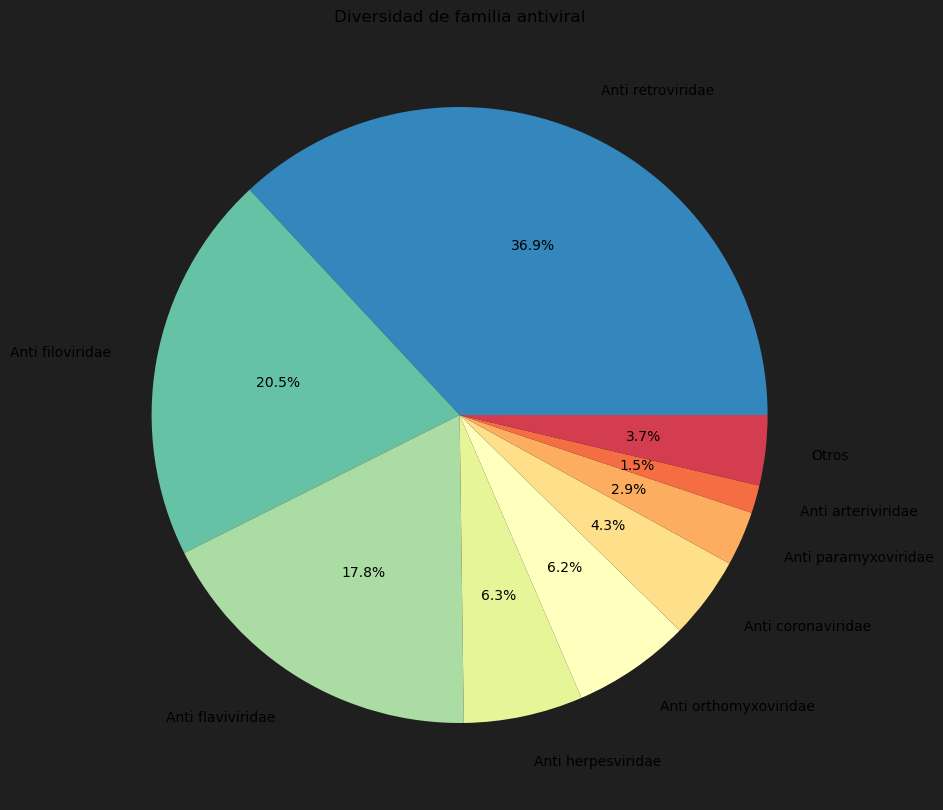

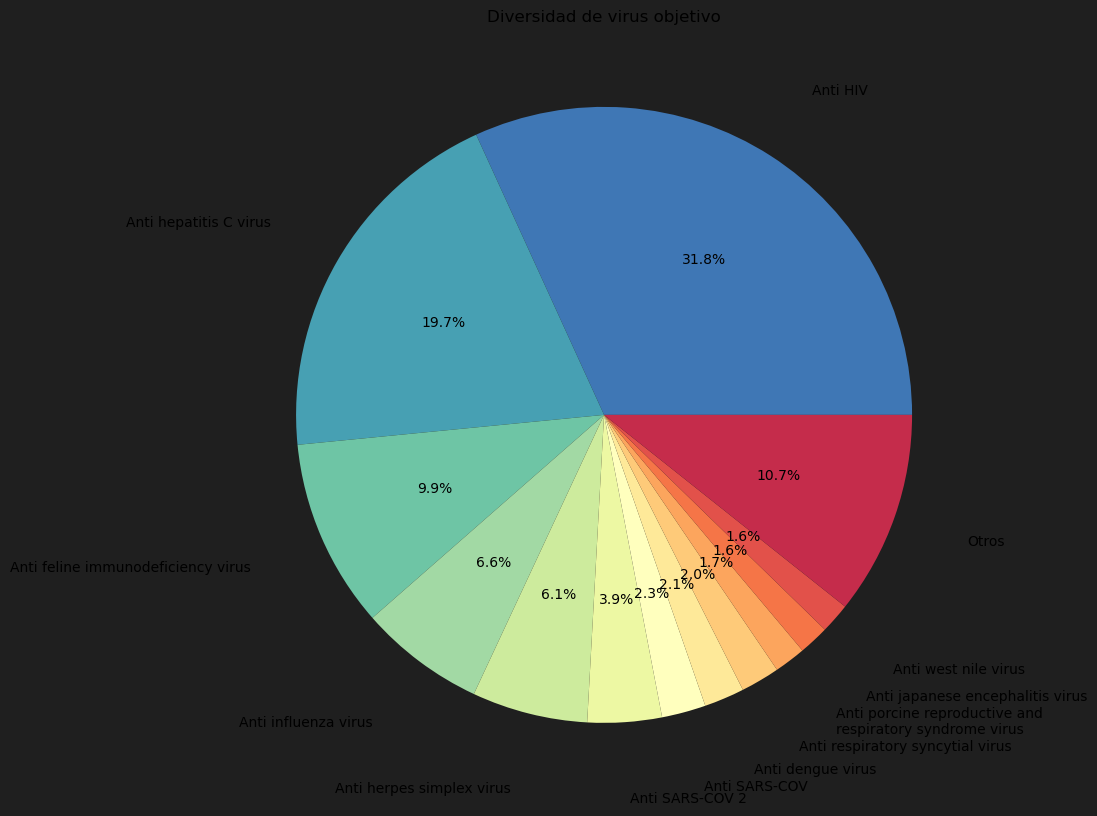

In [23]:
graphic_pie(viridae_filter, 20, 'Diversidad de familia antiviral', 1.15)
graphic_pie(sub_grouped_2, 20, 'Diversidad de virus objetivo', 1.25)